# Day055
## K-means 聚類算法
### Clustering簡介
> 聚類算法用於把族群或資料點分隔成一系列的組合，使得相同 cluster 中的資料點比其他的組更相似。

### Supervised learning vs. clustering
1. 監督式學習目標在於找出決策邊界(decision boundary)
2. Clustering 目標在於找出資料結構，在資料還沒有標記、問題還沒定義清楚時，聚類算法可以幫助我們理解資料特性，評估機器學習問題方向等，也是一種呈現資料的方式。

### K-means 聚類算法
- 把所有資料點分成 k 個 cluster，使得相同 cluster 中的所有資料點彼此儘量相似，而不同 cluster 的資料點儘量不同。
- 距離測量（e.g. 歐氏距離）用於計算資料點的相似度和相異度。每個 cluster 有一個中心點。中心點可理解為最能代表 cluster 的點。
- 詳細數學過程參考 [StatsLearning Lect12c 111113](https://www.youtube.com/watch?v=aIybuNt9ps4)

### 算法流程
1. 在資料中隨機選取 2 個點，稱爲 cluster centroid.
2. 對每一個 training example 根據它距離哪一個 cluster centroid 較近，標記爲該cluster (cluster assignment)
3. 把 centroid 移到同一群 training examples 的中心點 (update centroid)
4. 反覆進行 cluster assignment 及 update centroid，直到 cluster assignment 不再導致 training example 被 assign 爲不同的標記 (算法收斂)

### Optimization Objective
K-means 的目標是使總體群內平方誤差最小
$$\sum^n_{i=0}\min_{\mu_j \subset C}(\left \|x_j-\mu_j\right \|^2)$$

### K-means 注意事項
1. Random initialization: initial 設定的不同，會導致得到不同 clustering 的結果，可能導致 local optima，而非 global optima。
2. 因爲沒有預先的標記，對於 cluster 數量多少才是最佳解，沒有標準答案，得靠手動測試觀察，因此效果評估只能藉由人爲觀察。

## K-means 範例

#### 載入套件

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

#### 載入 toy example 資料集，使用[datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [2]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

#### 設定模型估計參數

In [3]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
             ]

#### 資料建模並視覺化結果

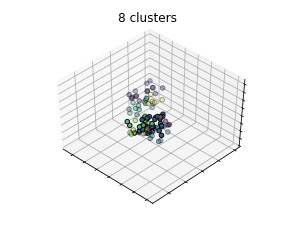

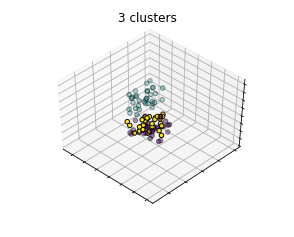

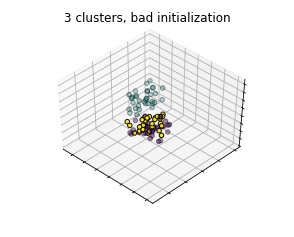

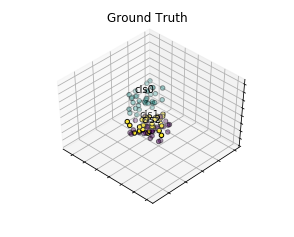

In [4]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    # fit data
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], 
               c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

## 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [6]:
estimators = [('k_means_5', KMeans(n_clusters=5)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=2, init='random'))
             ]

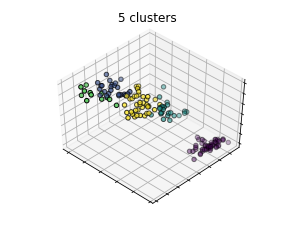

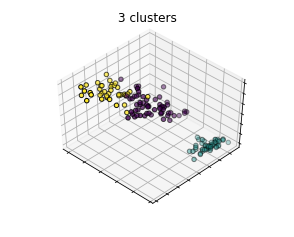

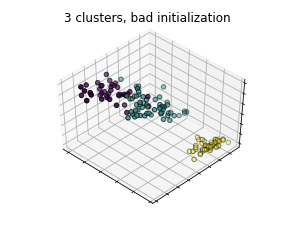

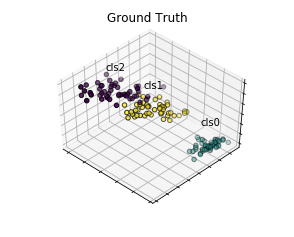

In [7]:
fignum = 1
titles = ['5 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    # fit data
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], 
               c=labels, edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12